# Managing Data

In this module, we were learnt how to prepare the dataset for machine learning modelling. `Data scientists` say data prepation, cleaning and visualizations take 70 to 80% of any machine learning modelling. let's start and explore the beauty of `managing data`.

For this exercise, I am going to prepare the dataset called `US-pumpkins.csv` for ML.

These are my objectives of the exercises
- load the `Dataframe`
- check for missing values
- drop the missing values
- check and convert columns to their suitable format for ml
- visualize the relations between variables 

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pumpkins = pd.read_csv(r"c:/users/danhaya/arewads/arewads-machine-learning/data/US-pumpkins.csv")
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [8]:
# Check for any missing data in the Dataframe

pumpkins.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

This `Dataframe` contains a lot of missing data. particularly these three columns; Type, sub variety and grade with over thousand of missing entries. while most low column has only hundred and three missing entries.

let me drop all the columns with missing data to make the `Dataframe` clean and tide for ml modelling.

In [ ]:
# let me create list of columns of interest

new_columns = ['Package', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

pumpkins.head()

,Package,Date,Low Price,High Price
0,24 inch bins,4/29/17,270.0,280.0
1,24 inch bins,5/6/17,270.0,280.0
2,24 inch bins,9/24/16,160.0,160.0
3,24 inch bins,9/24/16,160.0,160.0
4,24 inch bins,11/5/16,90.0,100.0


I decided to change the name of columns to suitable format that the computer will understand easily.

In [12]:
pumpkins.columns = pumpkins.columns.str.replace(' ', '_').str.lower()

pumpkins.head()

,package,date,low_price,high_price
0,24 inch bins,4/29/17,270.0,280.0
1,24 inch bins,5/6/17,270.0,280.0
2,24 inch bins,9/24/16,160.0,160.0
3,24 inch bins,9/24/16,160.0,160.0
4,24 inch bins,11/5/16,90.0,100.0


`Litle computation`

Here  i am going to determine the average price of pumpkings in a given month. I need to calculate the price by summing low and high price and divide the result by 2. And there's need to create a new column call month


In [25]:
price = ((pumpkins['low_price'] + pumpkins['high_price'])/2)
month = pd.DatetimeIndex(pumpkins['date']).month
print(month)

Index([ 4,  5,  9,  9, 11, 11,  9,  9, 10, 10,
       ...
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
      dtype='int32', name='date', length=1757)


In [26]:
print(price)

0       275.00
1       275.00
2       160.00
3       160.00
4        95.00
         ...  
1752     14.75
1753    275.00
1754    275.00
1755    275.00
1756    275.00
Length: 1757, dtype: float64


In [27]:
new_pumpkins = pd.DataFrame({
    'month' : month,
    'package' : pumpkins['package'],
    'low_price' : pumpkins['low_price'],
    'high_price': pumpkins['high_price'],
    'price': price
})
new_pumpkins.head()

,month,package,low_price,high_price,price
0,4,24 inch bins,270.0,280.0,275.0
1,5,24 inch bins,270.0,280.0,275.0
2,9,24 inch bins,160.0,160.0,160.0
3,9,24 inch bins,160.0,160.0,160.0
4,11,24 inch bins,90.0,100.0,95.0


In [15]:
new_pumpkins['package'].value_counts()

package
36 inch bins            663
24 inch bins            551
1/2 bushel cartons      234
1 1/9 bushel cartons    117
35 lb cartons            42
bushel cartons           37
40 lb cartons            19
1 1/9 bushel crates      17
each                     17
bins                     13
50 lb sacks              11
50 lb cartons            10
bushel baskets           10
22 lb cartons            10
20 lb cartons             6
Name: count, dtype: int64

There's something we need to address, the inconsistency in package units. we need to find a favourable unit that can accomodate all these units.
we can do some maths to standardize it. 

In [28]:
new_pumpkins.loc[new_pumpkins['package'].str.contains('1 1/9'), 'price'] = new_pumpkins['price']*(1 + 1/9)
new_pumpkins.loc[new_pumpkins['package'].str.contains('1/2'), 'price'] = new_pumpkins['price']*(1/2)

### `VIZUALIZATION WITH MATPLOTLIB`

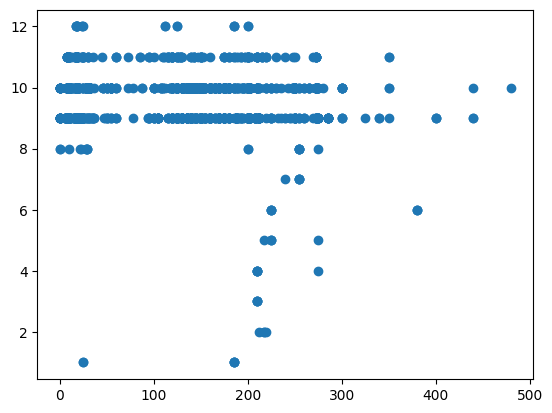

In [29]:
price = new_pumpkins.price
month = new_pumpkins.month

plt.scatter(price, month)

plt.show()

This plot does not make any sense, it spred the data points in a given month

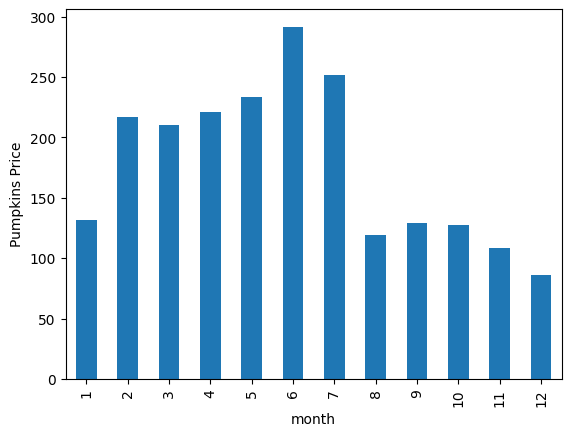

In [30]:
new_pumpkins.groupby('month')['price'].mean().plot(kind='bar')
plt.ylabel('Pumpkins Price')
plt.show()

**_If you come to this far_**
## _Thank you very much!_